In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Get and refine train data

In [50]:
train_listings = pd.read_csv('train_listing_data')
train_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6052 non-null   int64  
 1   id                                            6052 non-null   int64  
 2   description                                   5935 non-null   object 
 3   neighborhood_overview                         3344 non-null   object 
 4   host_since                                    6052 non-null   object 
 5   host_response_time                            3117 non-null   object 
 6   host_response_rate                            3117 non-null   object 
 7   host_acceptance_rate                          3327 non-null   object 
 8   host_is_superhost                             6052 non-null   object 
 9   host_neighbourhood                            4178 non-null   o

In [51]:
#train_listings = train_listings[train_listings['review_scores_rating'].notna()]

In [52]:
r_rating_train = train_listings["review_scores_rating"]
r_accuracy_train = train_listings["review_scores_accuracy"]
r_chekin_train = train_listings["review_scores_checkin"]
r_communication_train = train_listings["review_scores_communication"]
r_location_train = train_listings["review_scores_location"]
r_value_train = train_listings["review_scores_value"]

y_values_to_be_dropped = ["review_scores_rating", "review_scores_accuracy", "review_scores_checkin",
                         "review_scores_communication", "review_scores_location", "review_scores_value"]
train_listings = train_listings.drop(y_values_to_be_dropped, axis = 1)
train_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 1 to 6051
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4970 non-null   int64  
 1   id                                            4970 non-null   int64  
 2   description                                   4886 non-null   object 
 3   neighborhood_overview                         2931 non-null   object 
 4   host_since                                    4970 non-null   object 
 5   host_response_time                            2682 non-null   object 
 6   host_response_rate                            2682 non-null   object 
 7   host_acceptance_rate                          2878 non-null   object 
 8   host_is_superhost                             4970 non-null   object 
 9   host_neighbourhood                            3441 non-null   o

In [53]:
columns_to_be_dropped_listings = ['id', 'review_scores_cleanliness',
                                 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                 'calculated_host_listings_count_shared_rooms', 'description', 'neighborhood_overview', 'host_neighbourhood',
                                  'maximum_nights', 'availability_90', 'availability_365', "property_type", "host_verifications"]

In [54]:
columns_to_be_modified_and_then_dropped = ['host_since',  'last_review']

In [55]:
train_listings["host_response_rate"] = train_listings["host_response_rate"].fillna("0%")
train_listings["host_response_rate"] = train_listings["host_response_rate"].str.replace("%", "")
train_listings["host_response_rate"] = train_listings["host_response_rate"].astype(int)
train_listings["host_response_rate"] = train_listings["host_response_rate"].replace(0, np.NaN)
host_response_time_median = train_listings["host_response_rate"].median()
train_listings["host_response_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [56]:
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].fillna("0%")
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].str.replace("%", "").astype(int)
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].replace(0, np.NaN)
host_acceptance_rate_median = train_listings["host_acceptance_rate"].median()
train_listings["host_acceptance_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [57]:
import datetime
def contains_number(string):
    return any(char.isdigit() for char in string)

def transform_columns(original_df):
    now = datetime.datetime.now()
    
    #host_since
    original_df['new_date'] = pd.to_datetime(original_df['host_since'].astype(str), format='%Y-%m-%d')
    original_df['new_date'] = now - original_df['new_date']
    original_df['new_date'] = original_df['new_date'].dt.days
    
    #host_response_time
    original_df["host_response_time"].fillna("unknown", inplace  = True)
    
    #host_is_superhost
    original_df["host_is_superhost"] = (original_df["host_is_superhost"] == 't').astype(int)
    
    #host_has_profile_pic
    original_df["host_has_profile_pic"] = (original_df["host_has_profile_pic"] == 't').astype(int)
    
    #host_identity_verified
    original_df["host_identity_verified"] = (original_df["host_identity_verified"] == 't').astype(int)
    
    #neighbourhood 
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace(", Ireland", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace(", County", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace("Ireland", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace("Dublin", "")
    
    for index, row in original_df.iterrows():
        txt = row["neighbourhood"]
        num = 0
        if contains_number(str(txt)):
            num_list = [int(s) for s in str(txt).split() if s.isdigit()]
            num = int(num_list[0]) if len(num_list) >= 1 else 0
           
        original_df.at[index, "neighbourhood"] = num   
    print(original_df["neighbourhood"].value_counts())
    #amenities
    for index, row in original_df.iterrows():
        lst = row["amenities"]
        original_df.at[index, "amenities"] = int(len(lst))
    
    original_df[""] = original_df["amenities"].astype(int)
    
    #last_review
    original_df['days_since_last_review'] = pd.to_datetime(original_df['last_review'].astype(str), format='%Y-%m-%d')
    original_df['days_since_last_review'] = now - original_df['days_since_last_review']
    original_df['days_since_last_review'] = original_df['days_since_last_review'].dt.days
    
    #instant bookable
    original_df["instant_bookable"] = (original_df["instant_bookable"] == 't').astype(int)
    #host_is_superhost
    return original_df

In [58]:
train_listings_cleaned = transform_columns(train_listings)

0     4086
8      210
1      158
4       88
7       78
6       73
2       73
13      31
14      23
3       23
5       22
9       18
18      16
10      13
16      12
11      11
15      11
22       9
24       7
12       6
20       1
17       1
Name: neighbourhood, dtype: int64


### remove categorical columns

In [59]:
#train_listings_cleaned = train_listings_cleaned.drop(cat_attributes, axis=1)

### remove categorical columns

In [60]:
train_listings_cleaned = train_listings_cleaned.drop(columns_to_be_modified_and_then_dropped, axis=1)

In [61]:
train_listings_cleaned = train_listings_cleaned.drop(columns_to_be_dropped_listings, axis=1)

In [62]:
train_listings_cleaned = train_listings_cleaned.drop(train_listings_cleaned.columns[0], axis=1)
train_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 1 to 6051
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              4970 non-null   object 
 1   host_response_rate              4970 non-null   float64
 2   host_acceptance_rate            4970 non-null   float64
 3   host_is_superhost               4970 non-null   int32  
 4   host_listings_count             4970 non-null   int64  
 5   host_total_listings_count       4970 non-null   int64  
 6   host_has_profile_pic            4970 non-null   int32  
 7   host_identity_verified          4970 non-null   int32  
 8   neighbourhood                   4970 non-null   object 
 9   neighbourhood_cleansed          4970 non-null   object 
 10  latitude                        4970 non-null   float64
 11  longitude                       4970 non-null   float64
 12  room_type                       49

In [63]:
cat_attributes = ["host_response_time", "neighbourhood_cleansed", "room_type"]
num_attributes = list(train_listings_cleaned.drop(cat_attributes, axis=1))
#num_attributes = list(train_listings_cleaned)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [65]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [66]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

In [67]:
train_listings_prepared = full_pipeline.fit_transform(train_listings_cleaned)

In [68]:
train_listings_prepared.shape

(4970, 40)

## Get and refine train data

In [72]:
test_listings = pd.read_csv('test_listing_data')
test_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1514 non-null   int64  
 1   id                                            1514 non-null   int64  
 2   description                                   1476 non-null   object 
 3   neighborhood_overview                         850 non-null    object 
 4   host_since                                    1514 non-null   object 
 5   host_response_time                            815 non-null    object 
 6   host_response_rate                            815 non-null    object 
 7   host_acceptance_rate                          864 non-null    object 
 8   host_is_superhost                             1514 non-null   object 
 9   host_neighbourhood                            1056 non-null   o

In [73]:
#test_listings = test_listings[test_listings['review_scores_rating'].notna()]

In [74]:
r_rating_test = test_listings["review_scores_rating"]
r_accuracy_test = test_listings["review_scores_accuracy"]
r_chekin_test = test_listings["review_scores_checkin"]
r_communication_test = test_listings["review_scores_communication"]
r_location_test = test_listings["review_scores_location"]
r_value_test = test_listings["review_scores_value"]

y_values_to_be_dropped = ["review_scores_rating", "review_scores_accuracy", "review_scores_checkin",
                         "review_scores_communication", "review_scores_location", "review_scores_value"]
test_listings = test_listings.drop(y_values_to_be_dropped, axis = 1)
test_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1513
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1239 non-null   int64  
 1   id                                            1239 non-null   int64  
 2   description                                   1216 non-null   object 
 3   neighborhood_overview                         754 non-null    object 
 4   host_since                                    1239 non-null   object 
 5   host_response_time                            682 non-null    object 
 6   host_response_rate                            682 non-null    object 
 7   host_acceptance_rate                          727 non-null    object 
 8   host_is_superhost                             1239 non-null   object 
 9   host_neighbourhood                            862 non-null    o

In [75]:
test_listings["host_response_rate"] = test_listings["host_response_rate"].fillna("0%")
test_listings["host_response_rate"] = test_listings["host_response_rate"].str.replace("%", "").astype(int)
test_listings["host_response_rate"] = test_listings["host_response_rate"].replace(0, np.NaN)
host_response_time_median = test_listings["host_response_rate"].median()
test_listings["host_response_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [76]:
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].fillna("0%")
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].str.replace("%", "").astype(int)
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].replace(0, np.NaN)
host_acceptance_rate_median = test_listings["host_acceptance_rate"].median()
test_listings["host_acceptance_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [77]:
test_listings_cleaned = transform_columns(test_listings)

0     1034
8       56
1       42
4       23
2       15
6       15
7       11
9        7
15       5
18       4
5        4
14       4
24       4
3        4
13       3
16       2
22       2
11       2
10       1
12       1
Name: neighbourhood, dtype: int64


In [78]:
test_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1513
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1239 non-null   int64  
 1   id                                            1239 non-null   int64  
 2   description                                   1216 non-null   object 
 3   neighborhood_overview                         754 non-null    object 
 4   host_since                                    1239 non-null   object 
 5   host_response_time                            1239 non-null   object 
 6   host_response_rate                            1239 non-null   float64
 7   host_acceptance_rate                          1239 non-null   float64
 8   host_is_superhost                             1239 non-null   int32  
 9   host_neighbourhood                            862 non-null    o

In [79]:
test_listings_cleaned = test_listings_cleaned.drop(columns_to_be_modified_and_then_dropped, axis=1)

In [80]:
test_listings_cleaned = test_listings_cleaned.drop(columns_to_be_dropped_listings, axis=1)

## remove categorical columns

In [81]:
#test_listings_cleaned = test_listings_cleaned.drop(cat_attributes, axis=1)

## remove categorical columns

In [82]:
test_listings_cleaned = test_listings_cleaned.drop(test_listings_cleaned.columns[0], axis=1)
test_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1513
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              1239 non-null   object 
 1   host_response_rate              1239 non-null   float64
 2   host_acceptance_rate            1239 non-null   float64
 3   host_is_superhost               1239 non-null   int32  
 4   host_listings_count             1239 non-null   int64  
 5   host_total_listings_count       1239 non-null   int64  
 6   host_has_profile_pic            1239 non-null   int32  
 7   host_identity_verified          1239 non-null   int32  
 8   neighbourhood                   1239 non-null   object 
 9   neighbourhood_cleansed          1239 non-null   object 
 10  latitude                        1239 non-null   float64
 11  longitude                       1239 non-null   float64
 12  room_type                       12

In [83]:
test_listings_prepared = full_pipeline.fit_transform(test_listings_cleaned)

In [84]:
test_listings_prepared.shape

(1239, 40)

# Train and test model

In [85]:
r_rating_cat_test = pd.cut(r_rating_test,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

r_rating_cat_train = pd.cut(r_rating_train,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

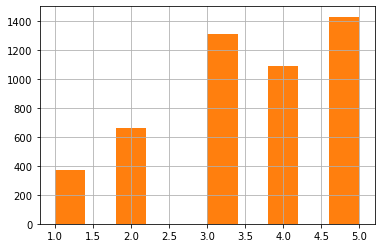

In [86]:
r_rating_cat_test.hist()
r_rating_cat_train.hist()

In [87]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
ratings_transformed_test = lab.fit_transform(r_rating_cat_test)
ratings_transformed_train = lab.fit_transform(r_rating_cat_train)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier3.fit(train_listings_prepared, ratings_transformed_train)
y_pred_train = classifier3.predict(train_listings_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed_train)
print(round(acc*100, 2), "%", sep="")

98.49%


In [89]:
y_pred_test = classifier3.predict(test_listings_prepared)
acc = accuracy_score(y_pred_test, ratings_transformed_test)
print(round(acc*100, 2), "%", sep="")

44.55%


In [90]:
from sklearn.dummy import DummyClassifier


clf = DummyClassifier(strategy='stratified')
clf.fit(train_listings_prepared, ratings_transformed_train)
y_pred_dummy = clf.predict(test_listings_prepared)
acc = accuracy_score(y_pred_dummy, ratings_transformed_test)
print(round(acc*100, 2), "%", sep="")

23.89%


## Grid search for Random forrest

In [91]:
from sklearn.model_selection import GridSearchCV
def best_model(model, grid, X_train, y_train):
    gs = GridSearchCV(model, grid)
    gs.fit(X_train, y_train)
    print("CV PARAMS: ", gs.best_params_)
    print("BEST MODEL: ", gs.best_estimator_)
    best_model = gs.best_estimator_
    return best_model


In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
grid = {'n_estimators' : [1, 30], 
        'max_features' : ['auto', 'log2'],  
        'max_depth' : [ 3, 5, 7, 10, 12, 15], 
        'criterion' : ['gini', 'entropy']}


In [93]:
best_mod = best_model(model, grid, train_listings_prepared, ratings_transformed_train)

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

CV PARAMS:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 30}
BEST MODEL:  RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=30,
                       random_state=0)


In [94]:
from sklearn.metrics import accuracy_score
y_pred_test = best_mod.predict(test_listings_prepared)
acc = accuracy_score(y_pred_test, ratings_transformed_test)
print(round(acc*100, 2), "%", sep="")

48.1%


In [95]:
unique, counts = np.unique(ratings_transformed_test, return_counts=True)
print(np.asarray((unique, counts)).T)
unique, counts = np.unique(ratings_transformed_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 101]
 [  1 175]
 [  2 337]
 [  3 274]
 [  4 336]
 [  5  16]]
[[   0  369]
 [   1  660]
 [   2 1314]
 [   3 1093]
 [   4 1430]
 [   5  104]]


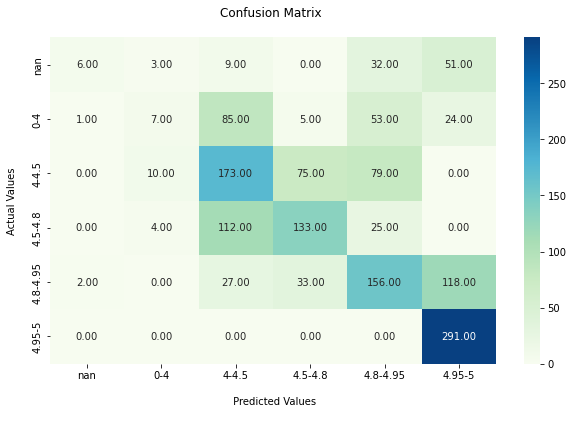

In [47]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(ratings_transformed_test,y_pred_test), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['nan', '0-4','4-4.5','4.5-4.8', '4.8-4.95', '4.95-5'])
fx.yaxis.set_ticklabels(['nan', '0-4','4-4.5','4.5-4.8', '4.8-4.95', '4.95-5'])
plt.show()

## Ridge classifier

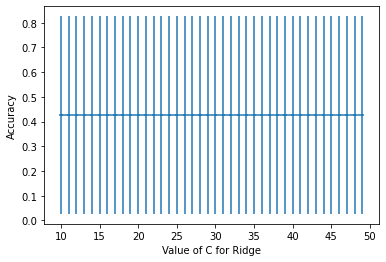

In [50]:
# search for an optimal value for C
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
C_range = range(10, 50)
C_scores = []
for C in C_range:
    ridge = RidgeClassifier(alpha=1/(2*C))
    scores = cross_val_score(ridge, train_listings_prepared, ratings_transformed_train, cv=5, scoring='accuracy')
    C_scores.append(scores.mean())

    
plt.errorbar(C_range, C_scores, xerr=0.2, yerr=0.4)
plt.xlabel('Value of C for Ridge')
plt.ylabel('Accuracy')
plt.show()

In [51]:
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        test_errors.append(accuracy_score(y_test, y_test_predict))
        
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)  
        

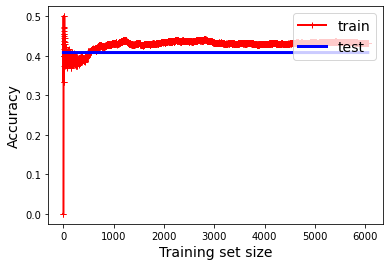

In [56]:
ridge_1 = RidgeClassifier(alpha=1)
ridge_1.fit(train_listings_prepared, ratings_transformed_train)
plot_learning_curves(ridge_1, train_listings_prepared, ratings_transformed_train, test_listings_prepared, ratings_transformed_test)

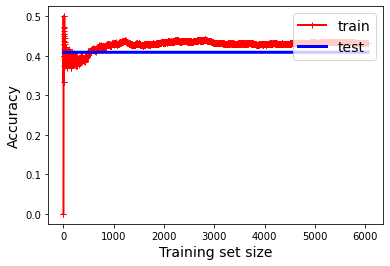

In [57]:
ridge_2 = RidgeClassifier(alpha=0.5)
ridge_2.fit(train_listings_prepared, ratings_transformed_train)
plot_learning_curves(ridge_2, train_listings_prepared, ratings_transformed_train, test_listings_prepared, ratings_transformed_test)

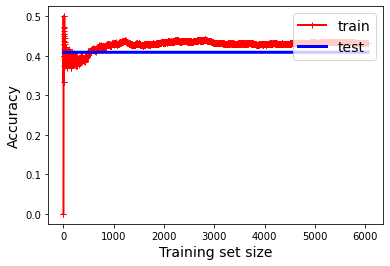

In [58]:
ridge_3 = RidgeClassifier(alpha=0.005)
ridge_3.fit(train_listings_prepared, ratings_transformed_train)
plot_learning_curves(ridge_3, train_listings_prepared, ratings_transformed_train, test_listings_prepared, ratings_transformed_test)

## kNN classifier

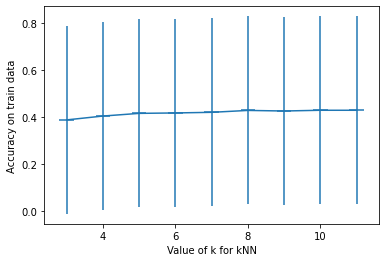

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(3, 12)
k_scores = []
k_alternative = []
for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(kNN, train_listings_prepared, ratings_transformed_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.errorbar(k_range, k_scores, xerr=0.2, yerr=0.4)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy on train data')
plt.show()

## Gaussian Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
grid = {"var_smoothing" : [1e-01, 1e-05, 1e-09, 1e-15]}

In [74]:
best_mod = best_model(model, grid, train_listings_prepared, ratings_transformed_train)

CV PARAMS:  {'var_smoothing': 1e-05}
BEST MODEL:  GaussianNB(var_smoothing=1e-05)


In [75]:
best_mod.fit(train_listings_prepared, ratings_transformed_train)
y_pred_train = best_mod.predict(train_listings_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed_train)
print(round(acc*100, 2), "%", sep="")

40.28%


## CNN model

split the data furthermore so we have a validation batch for the training

In [43]:
len(train_listings_prepared)

6052

In [44]:
X_train, X_valid = train_listings_prepared[:5500], train_listings_prepared[5500:]
y_train, y_valid = ratings_transformed_train[:5500], ratings_transformed_train[5500:]

In [45]:
print(len(X_train))
print(len(X_valid))

5500
552


In [46]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

### Train using Leaky ReLU 

In [53]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[40]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(6, activation="softmax")
])

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [55]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
172/172 [==============================] - 1s 2ms/step - loss: 1.9741 - accuracy: 0.1873 - val_loss: 1.8131 - val_accuracy: 0.2337
Epoch 2/20
172/172 [==============================] - 0s 1ms/step - loss: 1.7157 - accuracy: 0.2840 - val_loss: 1.6791 - val_accuracy: 0.3243
Epoch 3/20
172/172 [==============================] - 0s 1ms/step - loss: 1.6167 - accuracy: 0.3395 - val_loss: 1.6129 - val_accuracy: 0.3478
Epoch 4/20
172/172 [==============================] - 0s 1ms/step - loss: 1.5576 - accuracy: 0.3704 - val_loss: 1.5715 - val_accuracy: 0.3569
Epoch 5/20
172/172 [==============================] - 0s 1ms/step - loss: 1.5183 - accuracy: 0.3962 - val_loss: 1.5412 - val_accuracy: 0.3750
Epoch 6/20
172/172 [==============================] - 0s 1ms/step - loss: 1.4899 - accuracy: 0.4067 - val_loss: 1.5196 - val_accuracy: 0.3859
Epoch 7/20
172/172 [==============================] - 0s 1ms/step - loss: 1.4682 - accuracy: 0.4171 - val_loss: 1.5027 - val_accuracy: 0.4022
Epoch 

### PReLU

In [103]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[39]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [104]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [106]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
172/172 [==============================] - 0s 2ms/step - loss: 1.4701 - accuracy: 0.4289 - val_loss: 1.4948 - val_accuracy: 0.4293
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4562 - accuracy: 0.4331 - val_loss: 1.4823 - val_accuracy: 0.4366
Epoch 3/20
172/172 [==============================] - 1s 4ms/step - loss: 1.4442 - accuracy: 0.4353 - val_loss: 1.4734 - val_accuracy: 0.4366
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 1.4328 - accuracy: 0.4391 - val_loss: 1.4654 - val_accuracy: 0.4348
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 1.4230 - accuracy: 0.4445 - val_loss: 1.4561 - val_accuracy: 0.4402
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 1.4137 - accuracy: 0.4473 - val_loss: 1.4488 - val_accuracy: 0.4420
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 1.4050 - accuracy: 0.4485 - val_loss: 1.4428 - val_accuracy: 0.4475
Epoch 

### Selu model

In [115]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[39]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [116]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [117]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
172/172 [==============================] - 6s 17ms/step - loss: 1.7929 - accuracy: 0.2578 - val_loss: 1.6536 - val_accuracy: 0.2862
Epoch 2/5
172/172 [==============================] - 2s 14ms/step - loss: 1.6159 - accuracy: 0.3360 - val_loss: 1.5567 - val_accuracy: 0.3623
Epoch 3/5
172/172 [==============================] - 3s 15ms/step - loss: 1.5646 - accuracy: 0.3491 - val_loss: 1.5175 - val_accuracy: 0.3949
Epoch 4/5
172/172 [==============================] - 2s 13ms/step - loss: 1.4933 - accuracy: 0.3758 - val_loss: 1.5006 - val_accuracy: 0.3750
Epoch 5/5
172/172 [==============================] - 2s 13ms/step - loss: 1.4700 - accuracy: 0.4022 - val_loss: 1.4674 - val_accuracy: 0.4040


## Batch normalization

In [121]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[39]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 39)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 39)               156       
 hNormalization)                                                 
                                                                 
 dense_428 (Dense)           (None, 300)               12000     
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_429 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)            

In [123]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [125]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
172/172 [==============================] - 1s 3ms/step - loss: 1.5777 - accuracy: 0.4620 - val_loss: 1.7093 - val_accuracy: 0.4475
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 1.5562 - accuracy: 0.4740 - val_loss: 1.6852 - val_accuracy: 0.4565
Epoch 3/20
172/172 [==============================] - 1s 3ms/step - loss: 1.5322 - accuracy: 0.4796 - val_loss: 1.6618 - val_accuracy: 0.4620
Epoch 4/20
172/172 [==============================] - 1s 3ms/step - loss: 1.5097 - accuracy: 0.4809 - val_loss: 1.6441 - val_accuracy: 0.4601
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4907 - accuracy: 0.4911 - val_loss: 1.6273 - val_accuracy: 0.4638
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4675 - accuracy: 0.4898 - val_loss: 1.6120 - val_accuracy: 0.4547
Epoch 7/20
172/172 [==============================] - 1s 3ms/step - loss: 1.4581 - accuracy: 0.4915 - val_loss: 1.6038 - val_accuracy: 0.4547
Epoch 

second approach towards batch normalization

In [129]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[39]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [130]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [132]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
172/172 [==============================] - 1s 3ms/step - loss: 1.4962 - accuracy: 0.4493 - val_loss: 1.5405 - val_accuracy: 0.4475
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4746 - accuracy: 0.4478 - val_loss: 1.5262 - val_accuracy: 0.4475
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4541 - accuracy: 0.4595 - val_loss: 1.5126 - val_accuracy: 0.4511
Epoch 4/20
172/172 [==============================] - 1s 3ms/step - loss: 1.4386 - accuracy: 0.4605 - val_loss: 1.4982 - val_accuracy: 0.4511
Epoch 5/20
172/172 [==============================] - 1s 3ms/step - loss: 1.4259 - accuracy: 0.4645 - val_loss: 1.4845 - val_accuracy: 0.4511
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4093 - accuracy: 0.4682 - val_loss: 1.4716 - val_accuracy: 0.4583
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 1.4010 - accuracy: 0.4720 - val_loss: 1.4610 - val_accuracy: 0.4638
Epoch 

# Exponential Scheduling

In [56]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [57]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[40]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(6, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 70

In [64]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/70
172/172 [==============================] - 1s 3ms/step - loss: 1.5929 - accuracy: 0.4153 - val_loss: 1.3501 - val_accuracy: 0.4728 - lr: 0.0100
Epoch 2/70
172/172 [==============================] - 0s 2ms/step - loss: 1.2809 - accuracy: 0.4744 - val_loss: 1.2930 - val_accuracy: 0.4909 - lr: 0.0089
Epoch 3/70
172/172 [==============================] - 0s 2ms/step - loss: 1.2342 - accuracy: 0.4944 - val_loss: 1.2518 - val_accuracy: 0.4583 - lr: 0.0079
Epoch 4/70
172/172 [==============================] - 0s 1ms/step - loss: 1.1890 - accuracy: 0.5115 - val_loss: 1.2209 - val_accuracy: 0.4764 - lr: 0.0071
Epoch 5/70
172/172 [==============================] - 0s 1ms/step - loss: 1.1263 - accuracy: 0.5331 - val_loss: 1.0978 - val_accuracy: 0.5580 - lr: 0.0063
Epoch 6/70
172/172 [==============================] - 0s 1ms/step - loss: 1.0856 - accuracy: 0.5475 - val_loss: 1.1418 - val_accuracy: 0.5127 - lr: 0.0056
Epoch 7/70
172/172 [==============================] - 0s 1ms/step - lo

Epoch 53/70
172/172 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7849 - val_loss: 1.3672 - val_accuracy: 0.5435 - lr: 2.5119e-05
Epoch 54/70
172/172 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7864 - val_loss: 1.3672 - val_accuracy: 0.5453 - lr: 2.2387e-05
Epoch 55/70
172/172 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7864 - val_loss: 1.3673 - val_accuracy: 0.5453 - lr: 1.9953e-05
Epoch 56/70
172/172 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7878 - val_loss: 1.3677 - val_accuracy: 0.5471 - lr: 1.7783e-05
Epoch 57/70
172/172 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7878 - val_loss: 1.3688 - val_accuracy: 0.5435 - lr: 1.5849e-05
Epoch 58/70
172/172 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7875 - val_loss: 1.3689 - val_accuracy: 0.5453 - lr: 1.4125e-05
Epoch 59/70
172/172 [===================

In [65]:
score = model.evaluate(test_listings_prepared, ratings_transformed_test, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.5099075436592102


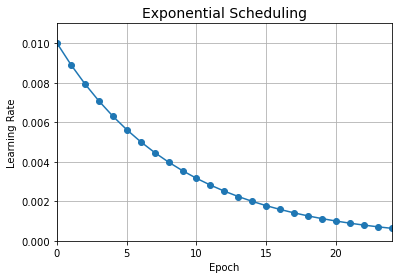

In [140]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Updating the learning rate at each iteration instead of each epoch through own callback function

In [142]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[39]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 30

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/30
172/172 [==============================] - 1s 4ms/step - loss: 1.6635 - accuracy: 0.4140 - val_loss: 1.3088 - val_accuracy: 0.4855 - lr: 0.0089
Epoch 2/30
172/172 [==============================] - 1s 3ms/step - loss: 1.3065 - accuracy: 0.4660 - val_loss: 1.3275 - val_accuracy: 0.4565 - lr: 0.0079
Epoch 3/30
172/172 [==============================] - 1s 4ms/step - loss: 1.2626 - accuracy: 0.4845 - val_loss: 1.2256 - val_accuracy: 0.5127 - lr: 0.0071
Epoch 4/30
172/172 [==============================] - 1s 3ms/step - loss: 1.2018 - accuracy: 0.5056 - val_loss: 1.2156 - val_accuracy: 0.4674 - lr: 0.0063
Epoch 5/30
172/172 [==============================] - 1s 3ms/step - loss: 1.1441 - accuracy: 0.5222 - val_loss: 1.1443 - val_accuracy: 0.5290 - lr: 0.0056
Epoch 6/30
172/172 [==============================] - 1s 3ms/step - loss: 1.1050 - accuracy: 0.5349 - val_loss: 1.1892 - val_accuracy: 0.4873 - lr: 0.0050
Epoch 7/30
172/172 [==============================] - 1s 3ms/step - lo

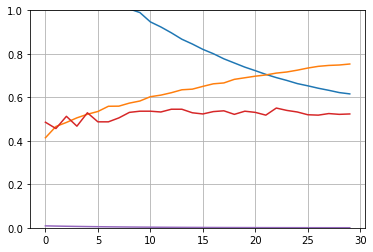

In [143]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [144]:
score = model.evaluate(test_listings_prepared, ratings_transformed_test, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.5112285614013672


## Feature Selection 

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
X = train_listings_cleaned.copy()
X['rating'] = r_rating_cat_train
X = X.dropna()


In [41]:
y = X['rating']
X = X.drop(['rating'], axis=1)

In [44]:
cat_att = ['host_response_time', 'neighbourhood', 'neighbourhood_cleansed', 'longitude', 'latitude', 'room_type']
X = X.drop(cat_att, axis=1)

In [45]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                             Specs          Score
4        host_total_listings_count  294784.634749
3              host_listings_count  195132.599874
22          days_since_last_review  118832.227067
15               number_of_reviews   72322.825209
10                       amenities   35964.421181
11                           price   31209.496277
21                        new_date   18967.700852
16           number_of_reviews_ltm   11873.833884
19  calculated_host_listings_count    2009.966596
12                  minimum_nights     705.694144


[0.01813526 0.0282759  0.02712152 0.03587819 0.04739355 0.00250114
 0.01195961 0.04084054 0.02573619 0.03339128 0.07717758 0.06773285
 0.05216456 0.02535426 0.02826419 0.1261513  0.04683257 0.02589512
 0.01359341 0.03256919 0.08784956 0.06755426 0.07762795]


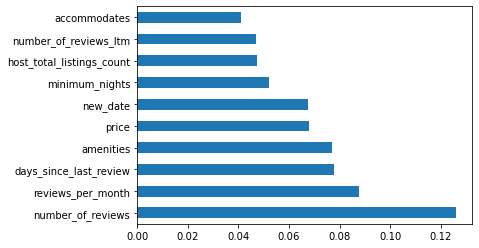

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
most_important = feat_importances.nlargest(10)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## In conclusion we will simply keep the categorical attributes along with the top 10 most relevant features

In [120]:
most_important = ['number_of_reviews', 'reviews_per_month', 'days_since_last_review', 'amenities', 
                 'price', 'new_date', 'minimum_nights', 'host_total_listings_count', 'number_of_reviews_ltm', 'accommodates',
                 'neighbourhood_cleansed', 'room_type', 'host_response_time']

In [121]:
train_listings_cleaned_2 = train_listings_cleaned.copy()
train_listings_cleaned_2["rating"] = r_rating_cat_train
train_listings_cleaned_2 = train_listings_cleaned_2.dropna()
r_rating_cat_train_2 = train_listings_cleaned_2["rating"]
train_listings_cleaned_2 = train_listings_cleaned_2.drop(["rating"], axis=1)
train_listings_cleaned_2 = train_listings_cleaned_2[most_important]

In [122]:
print(train_listings_cleaned_2.info())
print(r_rating_cat_train_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 1 to 6051
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_reviews          4700 non-null   int64  
 1   reviews_per_month          4700 non-null   float64
 2   days_since_last_review     4700 non-null   float64
 3   amenities                  4700 non-null   int32  
 4   price                      4700 non-null   float64
 5   new_date                   4700 non-null   int64  
 6   minimum_nights             4700 non-null   int64  
 7   host_total_listings_count  4700 non-null   int64  
 8   number_of_reviews_ltm      4700 non-null   int64  
 9   accommodates               4700 non-null   int64  
 10  neighbourhood_cleansed     4700 non-null   object 
 11  room_type                  4700 non-null   object 
 12  host_response_time         4700 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(3)
mem

In [123]:
test_listings_cleaned_2 = test_listings_cleaned.copy()
test_listings_cleaned_2["rating"] = r_rating_cat_test
test_listings_cleaned_2 = test_listings_cleaned_2.dropna()
r_rating_cat_test_2 = test_listings_cleaned_2["rating"]
test_listings_cleaned_2 = test_listings_cleaned_2.drop(["rating"], axis=1)
test_listings_cleaned_2 = test_listings_cleaned_2[most_important]


In [124]:
print(test_listings_cleaned_2.info())
print(r_rating_cat_test_2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1513
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_reviews          1169 non-null   int64  
 1   reviews_per_month          1169 non-null   float64
 2   days_since_last_review     1169 non-null   float64
 3   amenities                  1169 non-null   int32  
 4   price                      1169 non-null   float64
 5   new_date                   1169 non-null   int64  
 6   minimum_nights             1169 non-null   int64  
 7   host_total_listings_count  1169 non-null   int64  
 8   number_of_reviews_ltm      1169 non-null   int64  
 9   accommodates               1169 non-null   int64  
 10  neighbourhood_cleansed     1169 non-null   object 
 11  room_type                  1169 non-null   object 
 12  host_response_time         1169 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(3)
mem

In [125]:
cat_attributes = ["host_response_time", "neighbourhood_cleansed",  "room_type"]
num_attributes = list(train_listings_cleaned_2.drop(cat_attributes, axis=1))

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

In [126]:

train_listings_prepared_2 = full_pipeline.fit_transform(train_listings_cleaned_2)
test_listings_prepared_2 = full_pipeline.fit_transform(test_listings_cleaned_2)

In [127]:
print(train_listings_prepared_2.shape)
print(test_listings_prepared_2.shape)

(4700, 23)
(1169, 23)


## Train the models with the new data version

### Random forest 2

In [135]:
best_mod = best_model(model, grid, train_listings_prepared_2, r_rating_cat_train_2)

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

CV PARAMS:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}
BEST MODEL:  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=30, random_state=0)


C:\Users\catat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [136]:
from sklearn.metrics import accuracy_score
y_pred_test = best_mod.predict(test_listings_prepared_2)
acc = accuracy_score(y_pred_test, r_rating_cat_test_2)
print(round(acc*100, 2), "%", sep="")

46.54%


## Ridge classifier 2

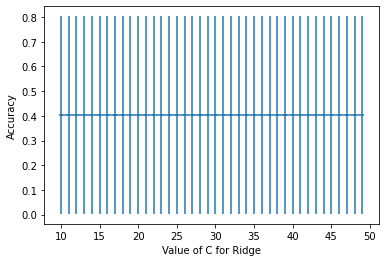

In [137]:
# search for an optimal value for C
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
C_range = range(10, 50)
C_scores = []
for C in C_range:
    ridge = RidgeClassifier(alpha=1/(2*C))
    scores = cross_val_score(ridge, train_listings_prepared_2, r_rating_cat_train_2, cv=5, scoring='accuracy')
    C_scores.append(scores.mean())

    
plt.errorbar(C_range, C_scores, xerr=0.2, yerr=0.4)
plt.xlabel('Value of C for Ridge')
plt.ylabel('Accuracy')
plt.show()

# CNN 2

### Leaky ReLu

In [138]:
X_train, X_valid = train_listings_prepared_2[:3500], train_listings_prepared_2[3500:]
y_train, y_valid = r_rating_cat_train_2[:3500], r_rating_cat_train_2[3500:]

In [146]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[23]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [147]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [148]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
110/110 [==============================] - 1s 4ms/step - loss: 2.3329 - accuracy: 0.1591 - val_loss: 2.0394 - val_accuracy: 0.2633
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 1.8935 - accuracy: 0.2969 - val_loss: 1.7940 - val_accuracy: 0.3233
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 1.7283 - accuracy: 0.3260 - val_loss: 1.6737 - val_accuracy: 0.3550
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 1.6382 - accuracy: 0.3557 - val_loss: 1.6026 - val_accuracy: 0.3633
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 1.5814 - accuracy: 0.3709 - val_loss: 1.5537 - val_accuracy: 0.3842
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 1.5418 - accuracy: 0.3783 - val_loss: 1.5168 - val_accuracy: 0.3917
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 1.5120 - accuracy: 0.3903 - val_loss: 1.4884 - val_accuracy: 0.3983
Epoch 

### Batch Normalization

In [152]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[23]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [153]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [154]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
110/110 [==============================] - 1s 3ms/step - loss: 2.8903 - accuracy: 0.1171 - val_loss: 2.4038 - val_accuracy: 0.0583
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 2.4700 - accuracy: 0.1711 - val_loss: 2.3535 - val_accuracy: 0.1158
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 2.2667 - accuracy: 0.2229 - val_loss: 2.1949 - val_accuracy: 0.2258
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 2.1342 - accuracy: 0.2714 - val_loss: 2.0835 - val_accuracy: 0.2883
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 2.0428 - accuracy: 0.3011 - val_loss: 2.0134 - val_accuracy: 0.3275
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 1.9890 - accuracy: 0.3314 - val_loss: 1.9544 - val_accuracy: 0.3517
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 1.9021 - accuracy: 0.3669 - val_loss: 1.9050 - val_accuracy: 0.3792
Epoch 

# Learning rate frequent update

In [156]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[23]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 30

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/30
110/110 [==============================] - 1s 3ms/step - loss: 1.6949 - accuracy: 0.3603 - val_loss: 1.5691 - val_accuracy: 0.3408 - lr: 0.0089
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 1.3528 - accuracy: 0.4251 - val_loss: 1.3194 - val_accuracy: 0.4475 - lr: 0.0079
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 1.3315 - accuracy: 0.4351 - val_loss: 1.3075 - val_accuracy: 0.4408 - lr: 0.0071
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.2912 - accuracy: 0.4406 - val_loss: 1.3206 - val_accuracy: 0.4625 - lr: 0.0063
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.2465 - accuracy: 0.4580 - val_loss: 1.3944 - val_accuracy: 0.3983 - lr: 0.0056
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 1.2249 - accuracy: 0.4580 - val_loss: 1.4153 - val_accuracy: 0.4158 - lr: 0.0050
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - lo

In [158]:
score = model.evaluate(test_listings_prepared_2, r_rating_cat_test_2, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.4585115611553192
